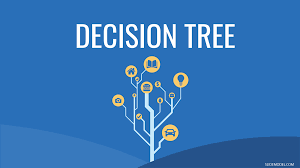

Decision Tree :
    
Decision tree is the most powerful and popular tool for classification and prediction.A Decision tree 
is a flowchart like tree structure, where each internal node denotes a test on an attribute, each 
branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

Decision trees can handle high dimensional data. In general decision tree classifier has good 
accuracy. 

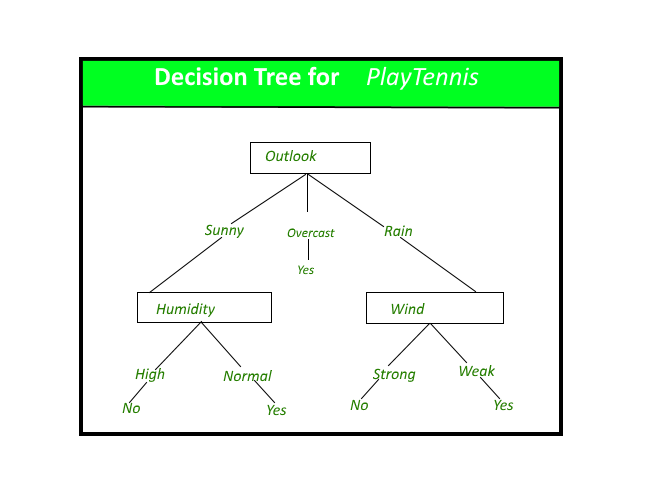

Decision Tree Representation : 

Decision trees classify instances by sorting them down the tree from the root to some leaf node, 
which provides the classification of the instance. An instance is classified by starting at the root 
node of the tree, testing the attribute specified by this node, then moving down the tree branch 
corresponding to the value of the attribute as shown in the above figure. This process is then 
repeated for the subtree rooted at the new node.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# total number of rows and columns
df.shape

(150, 6)

In [3]:
# total information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
# finding null values in the data
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# seperating the target variable

features=df.iloc[:,:1].values
labels=df.iloc[:,-1].values

In [7]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

In [8]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred=dt.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# confusion matrix for finding the preformance of the model
cm=confusion_matrix(y_test,y_pred)
print(cm,"confusion_matrix")


[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]] confusion_matrix


In [11]:
a=accuracy_score(y_pred,y_test)
print('accuracy_score',a)

accuracy_score 0.9666666666666667


In [12]:
cr=classification_report(y_test,y_pred)
print("Classification Report")
print(cr)

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Representation of Decision Tree




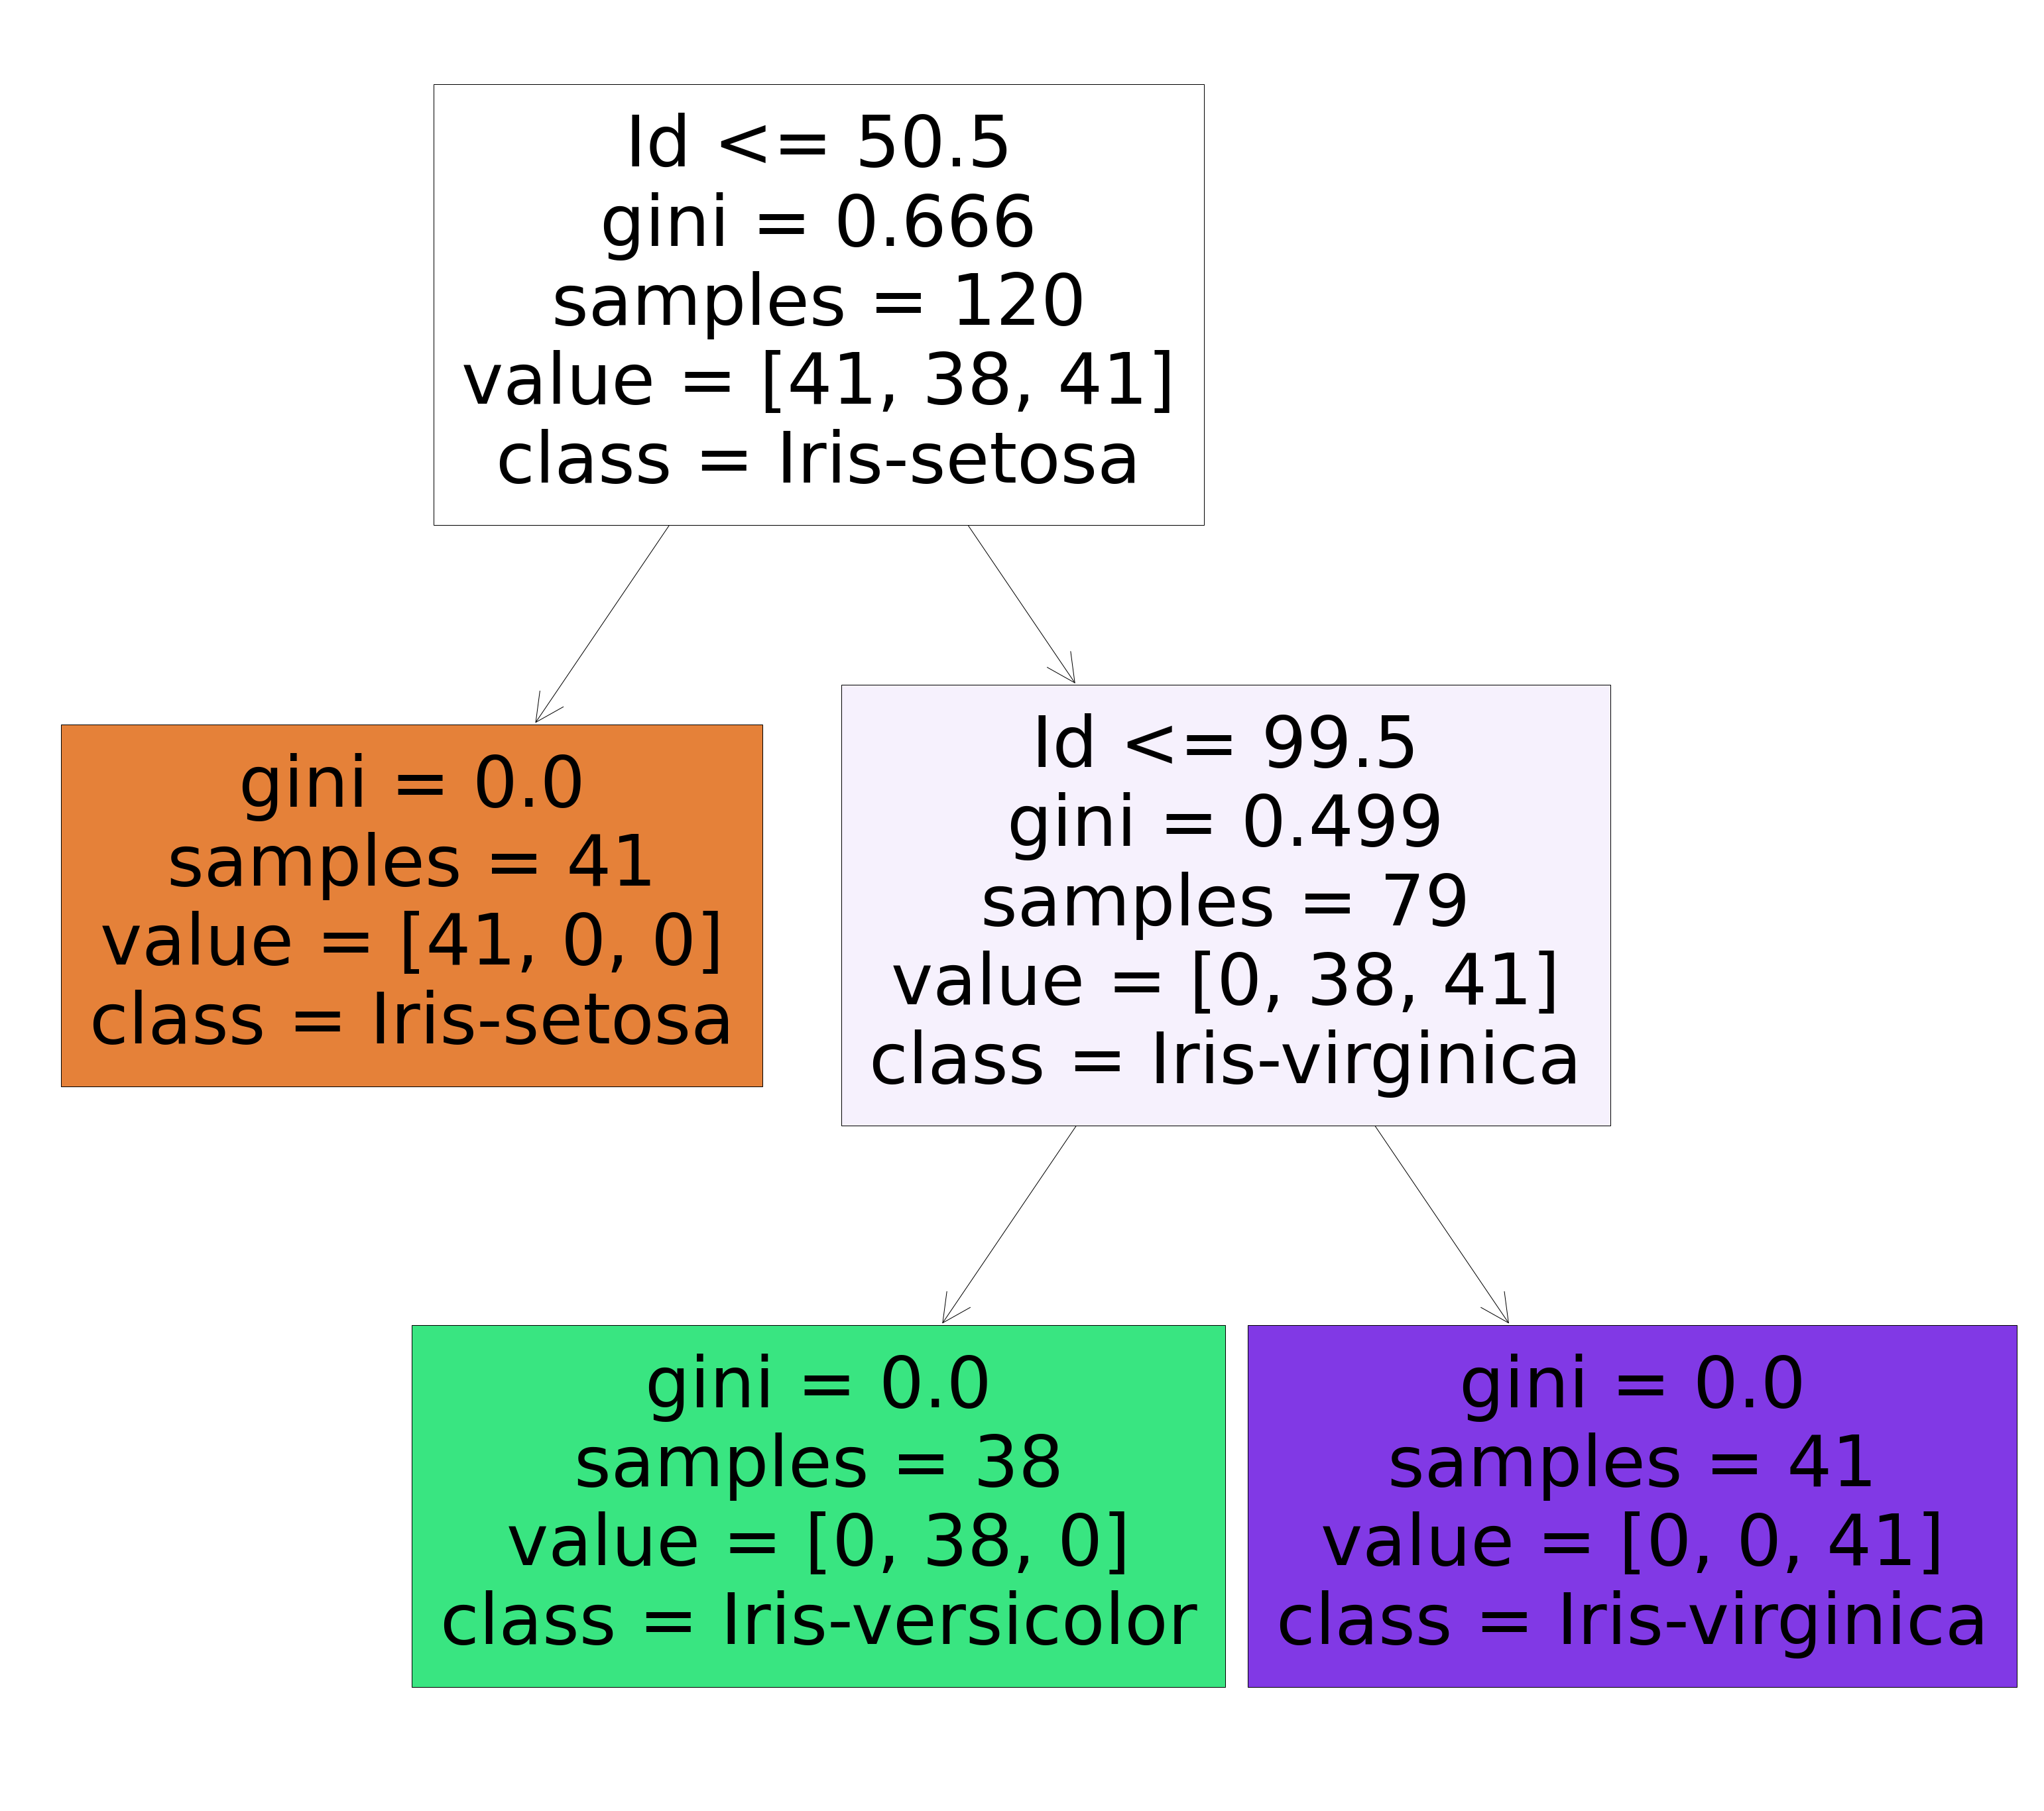

In [15]:

import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(55,50))
_ = tree.plot_tree(dt,
feature_names=df.columns[:-1],
class_names= dt.classes_, filled=True)